In [34]:
import pandas as pd

# Load dataset
df = pd.read_csv('data.csv')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=32)

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
# fix random seed for reproducibility
tf.random.set_seed(32)

In [37]:
# define a function to create the LSTM model
def create_model(units=100, dropout=0.2):
    LSTM_model = keras.Sequential()
    LSTM_model.add(layers.Embedding(input_dim=5000, output_dim=32))
    LSTM_model.add(layers.LSTM(units, dropout=dropout))
    LSTM_model.add(layers.Dense(1, activation='linear'))
    LSTM_model.compile(optimizer='adam', loss='mse')
    return LSTM_model

In [38]:
# create a KerasRegressor object
regressor = KerasRegressor(build_fn=create_model, verbose=0)

C:\Users\joshu\AppData\Local\Temp\ipykernel_36468\1389066205.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, verbose=0)


In [39]:
# define the hyperparameters to search over
param_grid = {
    'units': [100, 150, 200],
    'dropout': [0.0, 0.1, 0.2, 0.3],
}

In [40]:
# create a GridSearchCV object
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3)
# fit the grid search object to the data
grid_result = grid.fit(X_train, y_train, epochs=30, batch_size=1)

In [41]:
# print the best hyperparameters and the corresponding mean test score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -1191.493652 using {'dropout': 0.3, 'units': 100}


In [42]:
# Predict the values of the test set
y_pred = grid.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 6.077756876250488
Mean Squared Error: 93.00058811215068
Root Mean Squared Error: 9.643681253139315
R-squared: 0.949484422740252


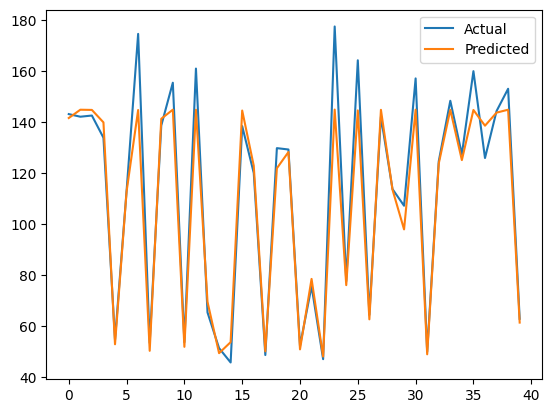

In [44]:
import matplotlib.pyplot as plt
y_test = y_test.reset_index(drop=True)

# plot the actual and predicted values on the same plot
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()